# Complete Data Prep and EDA Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *music_customers.csv*
* Listing history: *music_listening_history.xlsx*

In [7]:
# Read in the customer data
import pandas as pd

Data_Customer = pd.read_csv('../music_customers.csv')
Data_Customer

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,3/20/23,NaN,$2.99,NaN,6/3/23
6,5581,Reed Sharp,Email: sharp.tunes@email.com,3/21/23,Premium (No Ads),$9.99,NaN,NaN
7,5759,Carol Kingbird,Email: songbird.carol@email.com,3/22/23,Premium (No Ads),$9.99,NaN,6/2/23
8,5761,Sonata Nash,Email: musical.sonata@email.com,3/28/23,Premium (No Ads),$9.99,NaN,NaN
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,3/28/23,Basic (Ads),$2.99,NaN,NaN


In [8]:
# Read in the listening history
Data_listening_history = pd.read_excel('../music_listening_history.xlsx')
Data_listening_history

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song
...,...,...,...,...,...
500,7579,111282,4,111,Song
501,6588,111286,1,201,Podcast
502,5763,111333,1,110,Song
503,5763,111333,2,108,Song


In [10]:
# Read in the audio data
Data_audio = pd.read_excel('../music_listening_history.xlsx', sheet_name=1)
Data_audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [11]:
# Read in the session data
Data_Session = pd.read_excel('../music_listening_history.xlsx', sheet_name=2)
Data_Session

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00
...,...,...
85,111263,2023-05-20 15:17:30
86,111273,2023-05-20 16:01:00
87,111282,2023-05-23 23:51:00
88,111286,2023-05-27 02:15:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [13]:
Data_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [23]:
# Three columns must be converted into correct data types.
# 1. Convert "Member Since" into *datetime*
# 2. Convert "Subsription Rate" into *numeric*
# 3. Convert "Cancellation Date" into *datetime*

In [21]:
Data_Customer['Member Since'] = pd.to_datetime(Data_Customer['Member Since'])
Data_Customer['Cancellation Date'] = pd.to_datetime(Data_Customer['Cancellation Date'])
Data_Customer['Subscription Rate'] = pd.to_numeric(Data_Customer['Subscription Rate'].str.replace('$', ''))

C:\Users\Armin\AppData\Local\Temp\ipykernel_11092\187543142.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data_Customer['Member Since'] = pd.to_datetime(Data_Customer['Member Since'])
C:\Users\Armin\AppData\Local\Temp\ipykernel_11092\187543142.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data_Customer['Cancellation Date'] = pd.to_datetime(Data_Customer['Cancellation Date'])


In [22]:
Data_Customer.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [14]:
Data_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [25]:
# The data types all look correct in this dataframe.

In [15]:
Data_listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [26]:
# The data types all look correct in this dataframe.

In [16]:
Data_Session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [27]:
# The data types all look correct in this dataframe.

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [29]:
Data_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [ ]:
# 5 null values iside the "Subscription Plan" column
# 23 null values inside the "Discount?" column
# 17 null values inside the "Cancellation Date" column

In [36]:
Data_Customer[Data_Customer.isna().any(axis=1)].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [38]:
# Since the Subscription Rate is the same (2.99) for all NaN values inside Subscription Plan,
# I will replace them all with "Basic (Ads)"

In [39]:
Data_Customer['Subscription Plan'] = Data_Customer['Subscription Plan'].fillna('Basic (Ads)')
Data_Customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [43]:
Data_Customer[Data_Customer.isna().any(axis=1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [44]:
Data_Customer[Data_Customer['Subscription Rate'] == 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
21,6822,Kiki Keys,Email: kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,Yes,NaT
22,6824,Greta Groove,Email: groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
23,7087,Harmony Heart,Email: heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
25,7224,Melody Fitzgerald,Email: fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01
26,7401,Reed Murphy,Email: murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01
28,7581,Lyric Keys,Email: keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03
29,7583,Melody Singer,Email: melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-01


In [48]:
# From what I have observed, only those whose "subsription Rate" is 7.99 have discounts.
# Therefore, I believe i need to fill all NaN values inside the "Discount" column with "No"

In [49]:
Data_Customer['Discount?'] = Data_Customer['Discount?'].fillna('No')
Data_Customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT


In [52]:
# We will leave the "Cancellation Date" be for now.
# Just to make life easier, I wil Convert the "Discount" Column to a Binary class column.

In [54]:
import numpy as np

Data_Customer['Discount?'] = np.where(Data_Customer['Discount?'] == 'Yes', 1, 0)
Data_Customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [42]:
# No NaN values
Data_listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [41]:
# No NaN values
Data_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [40]:
# No NaN values
Data_Session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


#### ii. Inconsistent Text & Typos

In [56]:
Data_Customer.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.0,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.0,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.0,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.0,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.0,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.0,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,0.0,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.0,NaN


In [58]:
# There is a max "Subscription Rate" of 99.99!
# This looks odd!

In [59]:
Data_Customer[Data_Customer['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [60]:
# This is definitely a mistake! Let's correct it!

In [64]:
Data_Customer.iloc[15,5] = 9.99

In [65]:
Data_Customer[Data_Customer['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02


In [66]:
Data_Customer['Subscription Plan'].value_counts()

Subscription Plan
Basic (Ads)         17
Premium (No Ads)    13
Name: count, dtype: int64

In [67]:
# "Data_Customer" DataFrame seems to be okay now

In [71]:
Data_listening_history

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song
...,...,...,...,...,...
500,7579,111282,4,111,Song
501,6588,111286,1,201,Podcast
502,5763,111333,1,110,Song
503,5763,111333,2,108,Song


In [70]:
Data_listening_history['Audio Type'].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

In [73]:
Data_listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [74]:
# "Data_listening_history" DataFrame seems to be okay now.

In [77]:
Data_audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [78]:
Data_audio['Genre'].value_counts()

Genre
Pop Music     3
Comedy        3
Hip Hop       3
Country       2
Pop           2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [79]:
# We can put Pop Music and Pop in a same category!

In [82]:
Data_audio['Genre'] = np.where(Data_audio['Genre'] == 'Pop Music', 'Pop', Data_audio['Genre'])
Data_audio['Genre'].value_counts()

Genre
Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [85]:
# "Data_audio" DataFrame seems to be okay now.

In [84]:
Data_Session.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


In [87]:
# "Data_Session" DataFrame seems to be okay.

#### iii. Duplicate Rows

In [89]:
Data_Customer[Data_Customer.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [90]:
Data_listening_history[Data_listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [92]:
Data_audio[Data_audio.duplicated()]

,ID,Name,Genre,Popularity


In [93]:
Data_Session[Data_Session.duplicated()]

,Session ID,Session Log In Time


In [94]:
# There seems to be no duplicated values in any of the DataFrames!

#### iv. Outliers

In [95]:
Data_Customer.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.0,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.0,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.0,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.0,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.0,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.0,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,0.0,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.0,NaN


In [96]:
Data_listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [97]:
Data_audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [98]:
Data_Session.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


In [99]:
# There seems to be no outliers.

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [124]:
Data_Customer[Data_Customer['Cancellation Date'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT
10,5826,Chord Hayes,Email: harmonic.chord@email.com,2023-03-28,Basic (Ads),2.99,0,NaT
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,Basic (Ads),2.99,0,NaT
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT


In [126]:
Data_Customer['Cancelled'] = np.where(Data_Customer['Cancellation Date'].notna(), 1, 0)
Data_Customer

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [127]:
Data_Customer['Cancelled'].value_counts()

Cancelled
0    17
1    13
Name: count, dtype: int64

In [129]:
Data_Customer['Email'] = Data_Customer['Email'].str[6:]
Data_Customer

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [131]:
Data_Customer[Data_Customer['Cancellation Date'].notna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,0,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,0,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,0,2023-06-01,1


In [132]:
(Data_Customer['Cancellation Date'] - Data_Customer['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [133]:
# How long were customers members before they cancelled?
## About 1.5 months... but that might just because we have 3 months of data

In [136]:
Data_Customer.iloc[21,6] = 1
Data_Customer.iloc[22,6] = 1
Data_Customer.iloc[23,6] = 1
Data_Customer.iloc[25,6] = 1
Data_Customer.iloc[26,6] = 1
Data_Customer.iloc[28,6] = 1
Data_Customer.iloc[29,6] = 1

In [137]:
had_discount = Data_Customer[Data_Customer['Discount?'] == 1]
had_discount

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [139]:
# Cancellation rate for those who had a discount
had_discount['Cancelled'].sum()/ had_discount['Cancelled'].count()

np.float64(0.8571428571428571)

In [140]:
no_discount = Data_Customer[Data_Customer['Discount?'] == 0]
no_discount

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [141]:
# Calculate the cancellation rate for those who did not have a discount
no_discount['Cancelled'].sum() / no_discount['Cancelled'].count()

np.float64(0.30434782608695654)

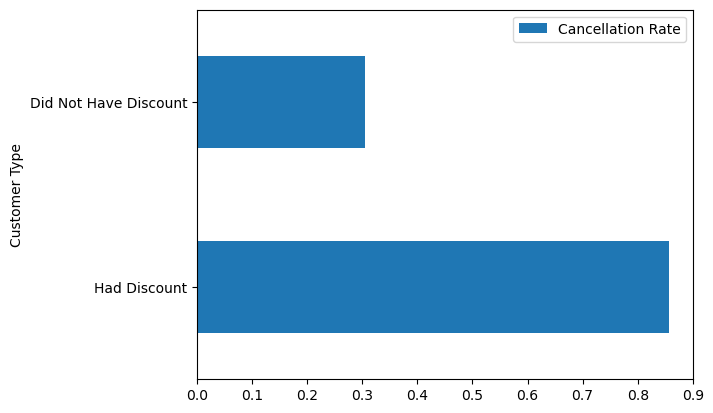

In [142]:
pd.DataFrame([['Had Discount', 0.8571428571428571],
             ['Did Not Have Discount', 0.30434782608695654]],
             columns=['Customer Type', 'Cancellation Rate']).plot.barh(x='Customer Type', y='Cancellation Rate', );

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [147]:
Data_audio.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [148]:
Data_listening_history.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [149]:
# They both have the same Audio ID
# i need to remove "Song-" form "Data_audio" DataFrame

In [155]:
Data_audio_clean = pd.DataFrame(Data_audio['ID'].str.split('-').to_list()).rename(columns={0:'Type', 1:'Audio ID'})
Data_audio_clean.head(2)

,Type,Audio ID
0,Song,101
1,Song,102


In [156]:
Data_audio_fin = pd.concat([Data_audio_clean, Data_audio], axis=1)
Data_audio_fin

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52
5,Song,106,Song-106,My Old Dog and My True Love,Country,23
6,Song,107,Song-107,Dirt Road Romance,Country,30
7,Song,108,Song-108,Chase the Dream,Hip Hop,4
8,Song,109,Song-109,Rise Above,Hip Hop,9
9,Song,110,Song-110,Boss Moves,Hip Hop,28


In [158]:
Data_audio_fin.dtypes

Type          object
Audio ID      object
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [160]:
Data_audio_fin['Audio ID'] = Data_audio_fin['Audio ID'].astype(int)

In [161]:
Data_audio_fin.dtypes

Type          object
Audio ID       int64
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [162]:
Data_audio_listening_history = Data_listening_history.merge(Data_audio_fin, how='left', on = 'Audio ID')
Data_audio_listening_history

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Song-111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4


In [170]:
Data_audio_listening_history.groupby('Customer ID')['Session ID'].nunique().sort_values(ascending=False)

Customer ID
5001    8
5267    7
5763    6
5002    4
5338    4
7224    4
6824    4
5826    3
6092    3
7158    3
6406    3
6163    3
5761    3
5581    3
7401    3
7087    3
6822    3
6588    3
5759    2
6586    2
6229    2
6029    2
6821    2
7579    2
7581    2
6584    2
5827    1
5404    1
5004    1
7583    1
Name: Session ID, dtype: int64

In [171]:
Data_audio_listening_history['Genre'].value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [172]:
Data_Customer.head(2)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0


In [173]:
Model_Data = Data_Customer[['Customer ID', 'Discount?', 'Cancelled']]
Model_Data.head()

,Customer ID,Discount?,Cancelled
0,5001,0,0
1,5002,0,0
2,5004,0,1
3,5267,0,0
4,5338,0,0


In [174]:
Data_audio_listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [182]:
number_of_sessions = Data_audio_listening_history.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [183]:
Model_Data = Model_Data.merge(number_of_sessions, how='left', on='Customer ID')
Model_Data

,Customer ID,Discount?,Cancelled,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,0,1,1
3,5267,0,0,7
4,5338,0,0,4
5,5404,0,1,1
6,5581,0,0,3
7,5759,0,1,2
8,5761,0,0,3
9,5763,0,0,6


In [184]:
Data_audio_listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [186]:
pd.get_dummies(Data_audio_listening_history['Genre']).astype(int)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [188]:
pd.concat([Data_audio_listening_history['Customer ID'], pd.get_dummies(Data_audio_listening_history['Genre']).astype(int)], axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,7579,0,0,0,1,0,0
501,6588,1,0,0,0,0,0
502,5763,0,0,1,0,0,0
503,5763,0,0,1,0,0,0


In [192]:
Genres_Data = pd.concat([Data_audio_listening_history['Customer ID'], pd.get_dummies(Data_audio_listening_history['Genre']).astype(int)], axis=1).groupby('Customer ID').sum().reset_index()
Genres_Data.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [193]:
Data_listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [201]:
Total_audio =Data_listening_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
Total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [204]:
Audio_Data = Genres_Data.merge(Total_audio, how='left', on='Customer ID')
Audio_Data.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [206]:
Model_Data['Percent Pop'] = Audio_Data['Pop'] / Audio_Data['Total Audio'] * 100
Model_Data.head()

,Customer ID,Discount?,Cancelled,Number of Sessions,Percent Pop
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,0,1,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [207]:
Model_Data['Percent Podcast'] = ((Audio_Data['True Crime'] + Audio_Data['Comedy']) / Audio_Data['Total Audio']) * 100
Model_Data.head()

,Customer ID,Discount?,Cancelled,Number of Sessions,Percent Pop,Percent Podcast
0,5001,0,0,8,56.666667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,0,1,1,100.000000,0.0
3,5267,0,0,7,51.111111,0.0
4,5338,0,0,4,0.000000,0.0


In [208]:
Model_Data

,Customer ID,Discount?,Cancelled,Number of Sessions,Percent Pop,Percent Podcast
0,5001,0,0,8,56.666667,0.000000
1,5002,0,0,4,0.000000,0.000000
2,5004,0,1,1,100.000000,0.000000
3,5267,0,0,7,51.111111,0.000000
4,5338,0,0,4,0.000000,0.000000
5,5404,0,1,1,100.000000,0.000000
6,5581,0,0,3,0.000000,100.000000
7,5759,0,1,2,100.000000,0.000000
8,5761,0,0,3,0.000000,100.000000
9,5763,0,0,6,64.516129,0.000000


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

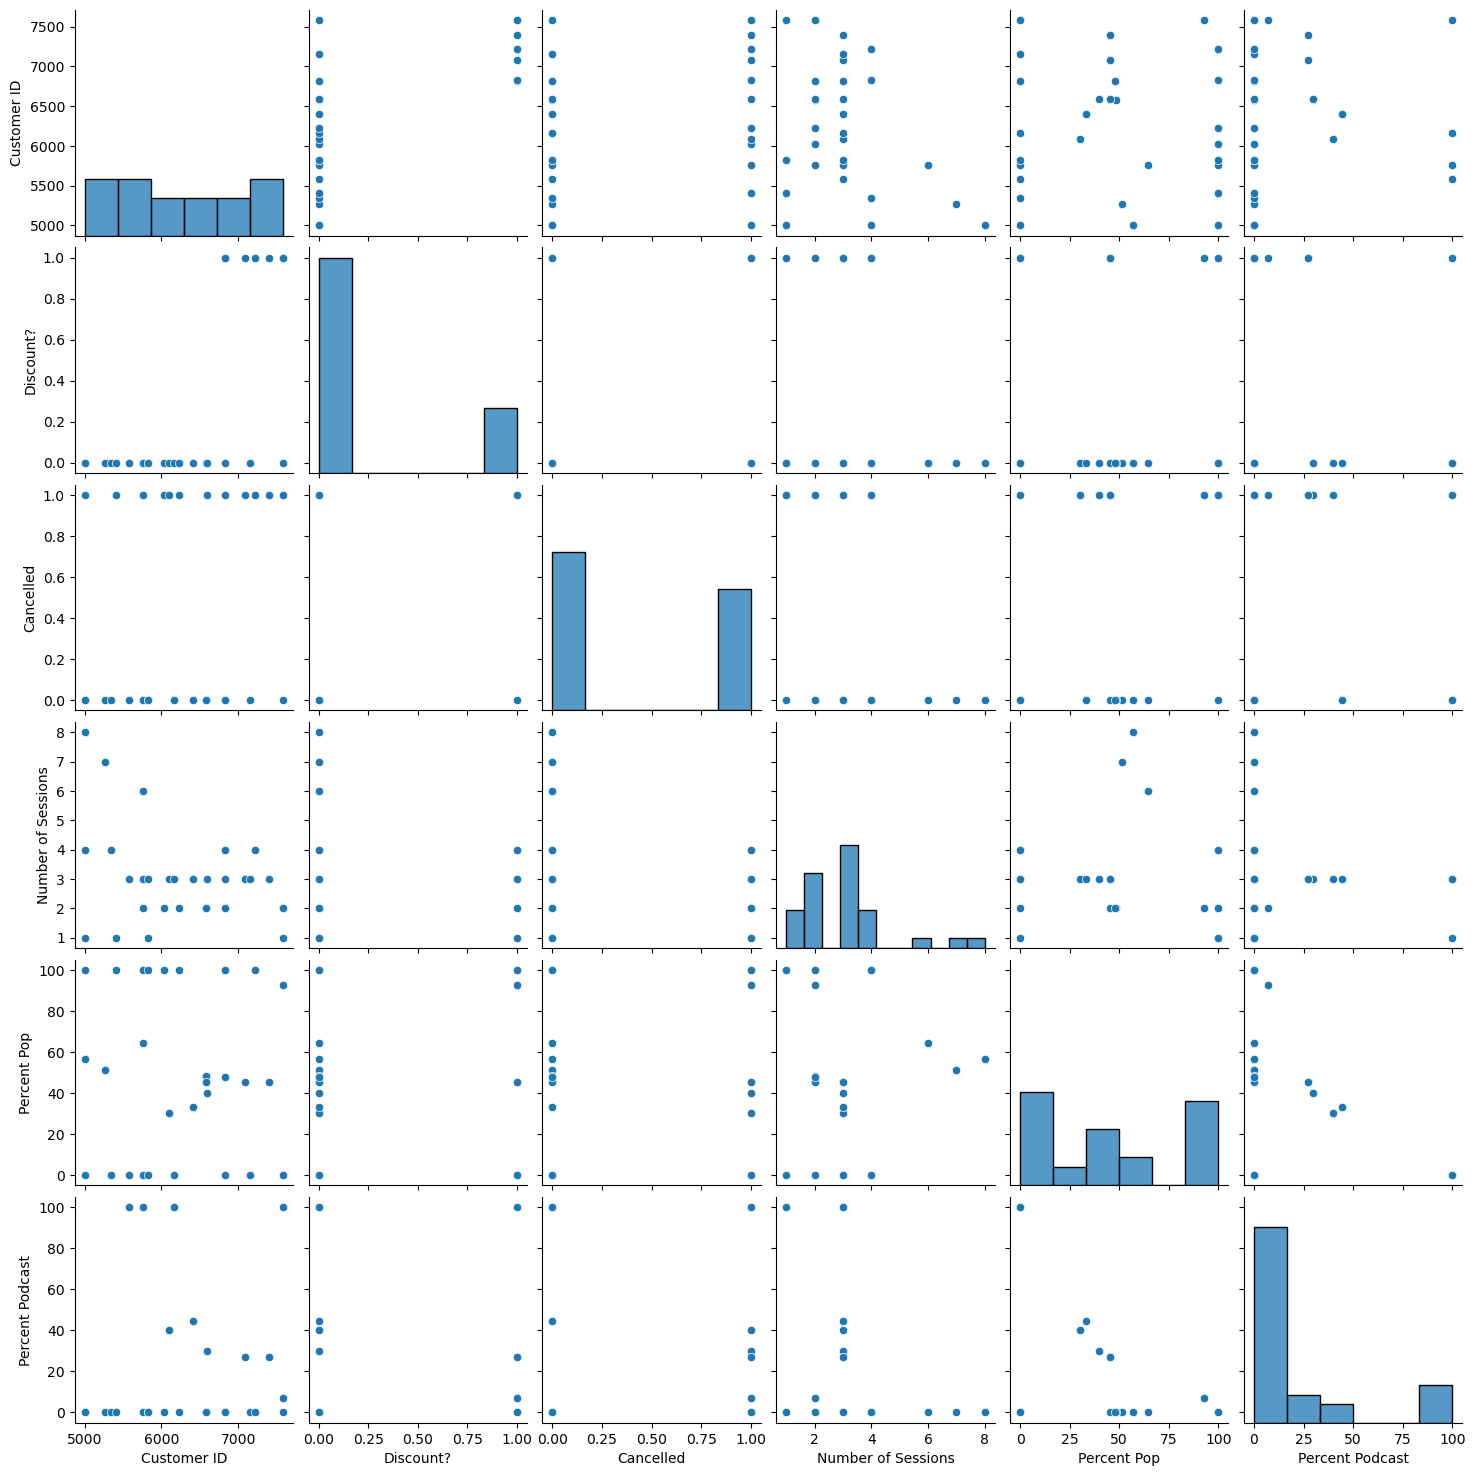

In [209]:
import seaborn as sns

sns.pairplot(Model_Data)

In [210]:
Model_Data.corr()

,Customer ID,Discount?,Cancelled,Number of Sessions,Percent Pop,Percent Podcast
Customer ID,1.000000,0.648514,0.269942,-0.337083,-0.076129,0.083083
Discount?,0.648514,1.000000,0.471825,-0.048877,0.112675,0.062938
Cancelled,0.269942,0.471825,1.000000,-0.333739,0.585630,-0.035414
Number of Sessions,-0.337083,-0.048877,-0.333739,1.000000,-0.131156,-0.125459
Percent Pop,-0.076129,0.112675,0.585630,-0.131156,1.000000,-0.487193
Percent Podcast,0.083083,0.062938,-0.035414,-0.125459,-0.487193,1.000000


In [211]:
# Observations
## A discount is correlated with a cancellation
## The more listening sessions, the fewer cancellations
## The more pop music, the more cancellations
## Podcast listening history seems unrelated to cancellations